In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Sample - Superstore.csv to Sample - Superstore.csv


In [ ]:
!pip install prophet streamlit pyngrok plotly scikit-learn pandas --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 26.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

df = pd.read_csv("Sample - Superstore.csv", encoding="latin1")


In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])



In [ ]:
monthly_sales = (
    df
    .resample('M', on='Order Date')['Sales']
    .sum()
    .reset_index()
)

/tmp/ipython-input-615136613.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M', on='Order Date')['Sales']


In [ ]:
monthly_sales.columns = ['ds', 'y']

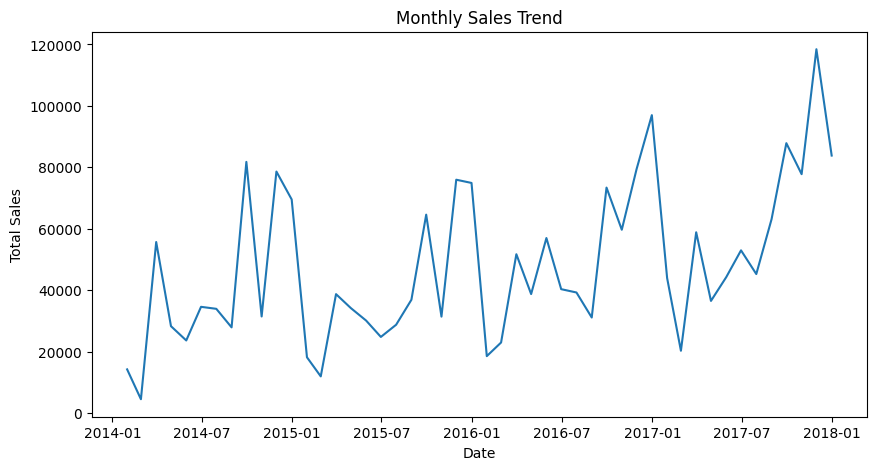

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['ds'], monthly_sales['y'])
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()



In [ ]:
train = monthly_sales[:-6]
test = monthly_sales[-6:]




In [ ]:
from prophet import Prophet

model = Prophet(
    yearly_seasonality=True,
    changepoint_prior_scale=0.3
)


model.fit(train)



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


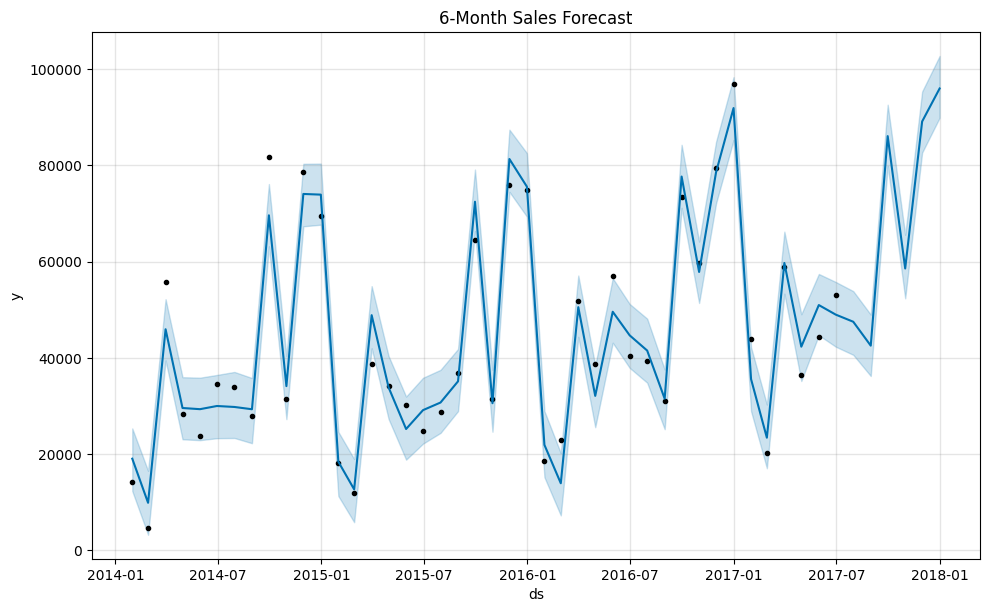

In [ ]:
model.plot(forecast)
plt.title("6-Month Sales Forecast")
plt.show()

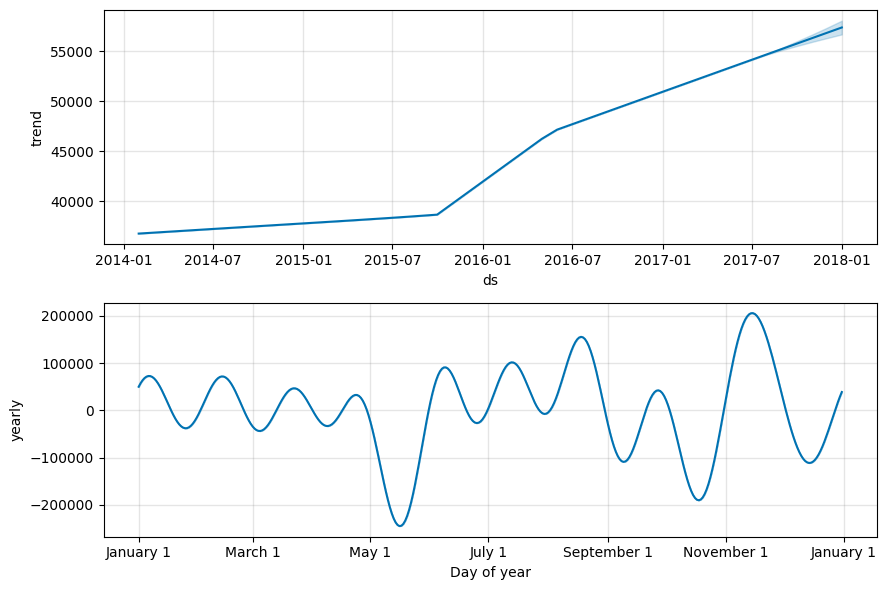

In [ ]:
model.plot_components(forecast)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_true = test['y'].values
y_pred = forecast['yhat'][-6:].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 14215.501319725312
RMSE: 17362.315069363955


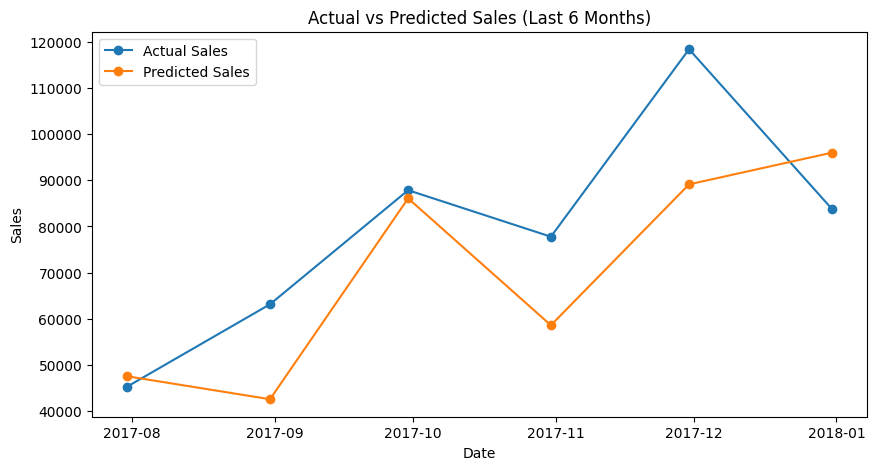

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(test['ds'], y_true, label='Actual Sales', marker='o')
plt.plot(test['ds'], y_pred, label='Predicted Sales', marker='o')
plt.legend()
plt.title("Actual vs Predicted Sales (Last 6 Months)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [ ]:
monthly_sales.to_csv("monthly_sales.csv", index=False)


In [ ]:
forecast[['ds', 'yhat']].to_csv("forecast_results.csv", index=False)


In [ ]:
from google.colab import files

files.download("monthly_sales.csv")
files.download("forecast_results.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(type(monthly_sales))
print(type(forecast))
print(monthly_sales.head())


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
          ds          y
0 2014-01-31  14236.895
1 2014-02-28   4519.892
2 2014-03-31  55691.009
3 2014-04-30  28295.345
4 2014-05-31  23648.287
